# Sensor Notebook

This notebook is about catching data with sensors attached to your raspberry pi. You will be guided through some examples. Afterwards you apply the learned to your use-case.

**Steps overview:**
<br>&emsp; `Step 1: Technical setup`
<br>&emsp;&emsp; - Basics about GrovePi
<br>&emsp;&emsp; - Attach sensors to the "GrovePi"
<br>&emsp; `Step 2: Load packages`
<br>&emsp;&emsp; - Make sure all required packages are loaded
<br>&emsp; `Step 3: Example blink LED`
<br>&emsp;&emsp; - Attach the LED to the GrovePi
<br>&emsp;&emsp; - Run the code to see the LED blink
<br>&emsp; `Step 4: Example weather station`
<br>&emsp;&emsp; - Attach the temperature/humidity sensor (and Display) to the GrovePi
<br>&emsp;&emsp; - Run the code to print/show the data
<br>&emsp; `Step 5: Explore other sensors (optional)`
<br>&emsp;&emsp; - Light sensor
<br>&emsp;&emsp; - Sound sensor
<br>&emsp;&emsp; - Ultrasonic sensor
<br>&emsp; `Step 6: Your use-case`
<br>&emsp;&emsp; - Set up the sensors according to your use-case requirements
<br>&emsp;&emsp; - Print the data of the sensors

## Step 1: Attach the "GrovePi" to the raspberry pi


#### Basics about GrovePi:

GrovePi is an easy-to-use and modular system for hardware hacking with the Raspberry Pi, no need for soldering or breadboards: plug in your Grove sensors and start programming directly. By connecting Grove Sensors to Raspberry Pi, it empowers your Pi in the physical world.

#### Attach Sensors to the GrovePi:

GrovePi and the Raspberry Pi are already set up. You can connect cables and sensors to the GrovePi without turning off the raspberry pi. GrovePi provides digital and analog ports. In the handbook that is part of the GrovePi starter kit is a description for each sensor including information about the port to use. 

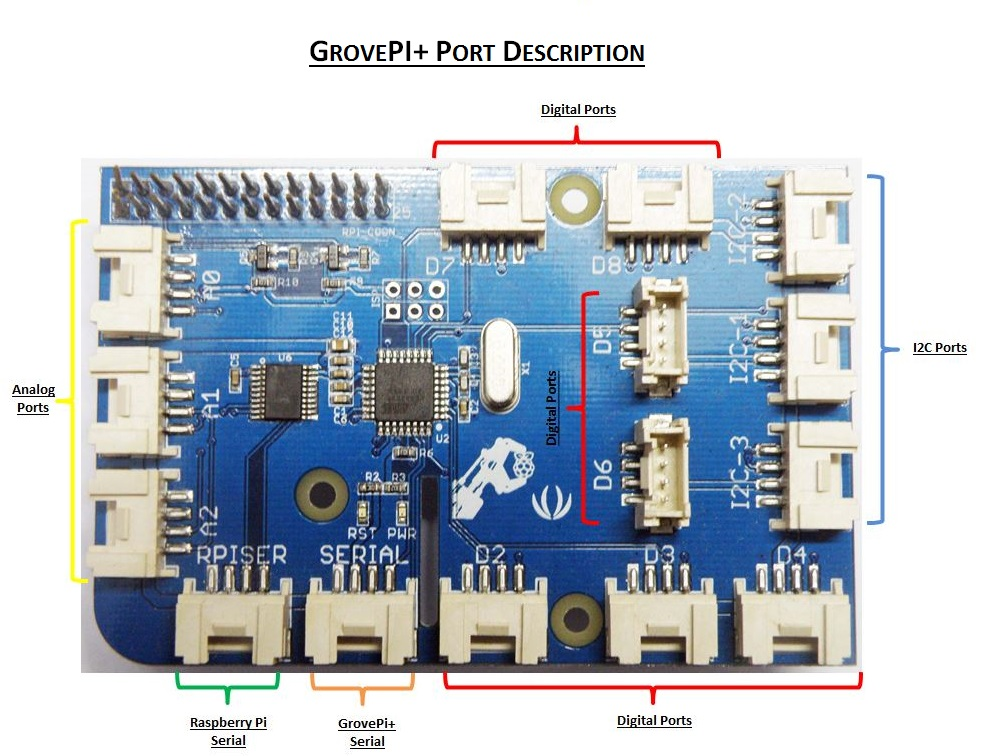

For further information on GrovePi ports see: https://www.dexterindustries.com/GrovePi/engineering/port-description/

## Step 2: Load packages

Packages contain prewritten code. Execute the following cell to load the packages we need for our examples/your project:

In [ ]:
import time
import grovepi
import grove_rgb_lcd
import math
print('Packages are loaded')

## Step 3: Example blink LED

Your first experiment will be a flashing LED. This example will blink a Grove LED connected to the GrovePi+. If you're having trouble seeing the LED blink, be sure to check the LED connection and the port number. You may also try reversing the direction of the LED on the sensor.

#### Programming with GrovePi

To collect and output data with the GrovePi you need to configure the ports of the GrovePi. The basic functions are:

- analogRead(pin)
- analogWrite(pin,value)
- digitalRead(pin)
- digitalWrite(pin,value)
- pinMode(pin,mode)

pin = number of the input/output pin to read from/write to<br>
value = the value you want to write to a pin (e.g. LED on = 1 or off = 0)<br>
mode = defines whether the port is used for 'INPUT' or 'OUTPUT'<br>
analogRead/digitalRead will return a value of the sensor that is stored in a variable (e.g. light_value

Further information can be found here: https://www.dexterindustries.com/GrovePi/programming/python-library-documentation/

#### Example blink LED

Please follow the instructions:

- Connect the LED to the digital port D6 and power on the Raspberry Pi, using the Grove wire connector
- Run the cell below
- Stop execution of cell by clicking on "Interrupt the Kernal" button next to the play button

In [ ]:
# Define the port of the LED (in this case: digital port D6)
led = 6

# Define the LED port as OUTPUT port
grovepi.pinMode(led,"OUTPUT")

# Initial print statements
print ("Connect the LED to the D{} port !".format(led))

# Start infinite loop to blink the LED
while True:
    try:
        #Blink the LED
        grovepi.digitalWrite(led,1)
        print ("LED ON!")
        time.sleep(1)
        
        #Turn off LED
        grovepi.digitalWrite(led,0)
        print ("LED OFF!")
        time.sleep(1)

    except KeyboardInterrupt:
        # Turn LED off before stopping
        grovepi.digitalWrite(led,0)
        break
    except IOError:
        # Print "Error" if communication error encountered
        print ("Error")

## Step 3: Example weather station

Your second experiment will collect temperature and humidity data and:
> a) print it out

> b) display it on the LED Screen

#### Programming with GrovePi

The temperature and humidity sensor 

- dht (pin,module_type)

pin = number of the input/output pin to read from/write to<br>
module_type = there are three types of sensors, we use the sensor DHT11 (module_type = 0)

The function returns an array of 2 floats [temp,humidity]

#### a) Example: Print out temperature and humidity data:

Please follow the instructions:

- Connect the temperature and humidity sensor to digital port 4 (D4) using the Grove wire connector
- Run the cell below
- Influence the sensor to see the value changing
- Stop execution of cell by clicking on "Interrupt the Kernal" button next to the play button

In [ ]:
# Define the port of the Sensor (in this case: digital port D4)
temp_humidity_sensor = 4  

# Define the sensor port as INPUT port
grovepi.pinMode(temp_humidity_sensor,"INPUT")

# start infinite loop
while True:
    try:
        # The function grovpi.dht collects the data from the sensor 
        # and returns two values, the temperature and the humidity
        [temp_value,humidity_value] = grovepi.dht(temp_humidity_sensor,0)  
        
        # check if temp_value and humidity_value are not empty
        if math.isnan(temp_value) is False and math.isnan(humidity_value) is False:
            
            # print the values that the sensor collected
            print(f"temp = {temp_value} C humidity = {humidity_value}")
            
            # wait for 1 second
            time.sleep(1)

    except IOError:
        print ("Error")
    except KeyboardInterrupt:
        break


### b) Example: Display temperature and humidity data on LED Screen:

Please follow the instructions:

- Connect the temperature and humidity sensor to digital port 4 (D4) **and the LCD display to any I2C port** using the Grove wire connector
- Run the cell below
- Stop execution of cell by clicking on "Interrupt the Kernal" button next to the play button

In [ ]:
# Define the port of the Sensor (in this case: digital port D4)
temp_humidity_sensor = 4  

# Define the sensor port as INPUT port
grovepi.pinMode(temp_humidity_sensor,"INPUT")

# set color of LED background
grove_rgb_lcd.setRGB(0,255,0)

# start infinite loop
while True:
    try:
        # get the temperature and Humidity from the DHT sensor
        [temp_value,humidity_value] = grovepi.dht(temp_humidity_sensor,0)
        
        # check if temp_value and humidity_value are not empty
        if math.isnan(temp_value) is False and math.isnan(humidity_value) is False:
            
            # show the values that the sensor collected on the LCD screen
            grove_rgb_lcd.setText_norefresh("Temp:" + str(temp_value) + "C\n" + "Humidity :" + str(humidity_value) + "%")  
            
            # print the values that the sensor collected
            print(f"temp = {temp_value} C \n humidity = {humidity_value}")
        
        # wait for 1 second
        time.sleep(1)
    
    except IOError:
        grove_rgb_lcd.setText("")
        print ("Error")
    
    except KeyboardInterrupt:
        grove_rgb_lcd.setRGB(0,0,0)
        grove_rgb_lcd.setText("")
        break

## Step 5: Explore other sensors (optional)

#### Light Sensor:

GrovePi Example for using the Grove Light Sensor and the LED together to turn the LED On and OFF if the background light is greater than a threshold.

In [ ]:
# Define the port of the Sensor (in this case: analog port A1)
light_sensor = 1

# Define the port of the LED (in this case: digital port D6)
led = 6

# Turn on LED once sensor exceeds threshold resistance
threshold = 10

# Define the sensor port as INPUT port and LED port as OUTPUT port
grovepi.pinMode(light_sensor,"INPUT")
grovepi.pinMode(led,"OUTPUT")

# start infinite loop
while True:
    try:
        # Get sensor value
        light_sensor_value = grovepi.analogRead(light_sensor)

        # Calculate resistance of sensor in K
        resistance = (float)(1023 - light_sensor_value) * 10 / light_sensor_value

        if resistance > threshold:
            # Send HIGH to switch on LED
            grovepi.digitalWrite(led,1)
        else:
            # Send LOW to switch off LED
            grovepi.digitalWrite(led,0)

        print("light_sensor_value = %d \t resistance = %.2f" %(light_sensor_value,  resistance))
        time.sleep(.5)

    except IOError:
        print ("Error")
        grovepi.digitalWrite(led,0)
    
    except KeyboardInterrupt:
        grovepi.digitalWrite(led,0)
        break


#### Sound Sensor

GrovePi Example for using the Grove Sound Sensor

In [ ]:
# Define the port of the Sensor (in this case: analog port A0)
sound_sensor = 0

# Define the port of the LED (in this case: digital port D6)
led = 6

# Define the sensor port as INPUT port and LED port as OUTPUT port
grovepi.pinMode(sound_sensor,"INPUT")
grovepi.pinMode(led,"OUTPUT")

# start infinite loop
while True:
    try:
        # Get sensor value
        sound_sensor_value = grovepi.analogRead(sound_sensor)

        # If loud, illuminate LED, otherwise dim
        if sound_sensor_value > 600:
            grovepi.digitalWrite(led,1)
        else:
            grovepi.digitalWrite(led,0)

        # print the values that the sensor collected
        print("sound_sensor_value = %d" %sound_sensor_value)
        
        # wait half a second
        time.sleep(.5)

    except IOError:
        print ("Error")
    
    except KeyboardInterrupt:
        grovepi.digitalWrite(led,0)
        break


#### Ultrasonic Ranger Sensor

GrovePi Example for using the Grove Ultrasonic Ranger

In [ ]:
# Define the port of the Sensor (in this case: digital port D5)
ultrasonic_ranger = 5

# Define the sensor port as INPUT port
grovepi.pinMode(ultrasonic_ranger,"INPUT")

# start infinite loop
while True:
    try:
        # Get sensor value
        ultrasonic_sensor_value = grovepi.ultrasonicRead(ultrasonic_ranger)

        # print the values that the sensor collected
        print(f"ultrasonic sensor value = {ultrasonic_sensor_value}")
        
        # wait 1 second
        time.sleep(1) # don't overload the i2c bus
        

    except Exception as e:
        print ("Error:{}".format(e))
    
    except KeyboardInterrupt:
        break
    

#### 3-Axis Digital Accelerometer

GrovePi Example for using the Grove 3-Axis Digital Accelerometer

In [2]:
#Code

#### Many Sensors:

In [ ]:
# Define the port of the Sensor:
temp_humidity_sensor = 4  # The Sensor goes on digital port D4.
light_sensor = 1 # Connect the Grove Light Sensor to analog port A1
sound_sensor = 0 # Connect the Grove Sound Sensor to analog port A0
ultrasonic_ranger = 5 # Connect the Grove Ultrasonic Ranger to digital port D5

# Define the sensor port as INPUT port
grovepi.pinMode(temp_humidity_sensor,"INPUT")
grovepi.pinMode(light_sensor,"INPUT")
grovepi.pinMode(sound_sensor,"INPUT")
grovepi.pinMode(ultrasonic_ranger,"INPUT")

# temp_humidity_sensor_type
blue = 0   # The Blue colored sensor.

# start infinite loop
while True:
    try:       
        # Get sensor value 
        ultrasonic_sensor_value = grovepi.ultrasonicRead(ultrasonic_ranger)
        #ultrasonic_ranger = 0
        light_value = grovepi.analogRead(light_sensor)
        #light_value = 1
        sound_value = grovepi.analogRead(sound_sensor)
        #sound_value = 0
        [temp_value,humidity_value] = grovepi.dht(temp_humidity_sensor,0)
        
        # print the values that the sensor collected
        print(f"Temperatur = {temp_value}C \t Humidity = {humidity_value}% \t Light = {light_value} \t Sound = {sound_value} \t Ultrasonic Ranger = {ultrasonic_sensor_value}")
        
        # wait 1 second        
        time.sleep(1)

    except IOError:
        print ("Error")

    except KeyboardInterrupt:
        break

# Apply - Create the technical setup for your use-case 

Next Step: build your code!

Based on your solution concept from the first sprint, apply the sensors to the microscope, read the data with a Python script and print the values. 

Once you are done and still have time, you can think of how to include other technical elements (Display, LED, Buzzer, ...) to your solution.